In [1]:
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
import xgboost as xgb
import matplotlib.pyplot as plt

/Users/renpengju/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
def load_spectrum_file(dir_path):
    data = []
    label = []
    file_dir_list = os.listdir(dir_path)
    for file_dir in file_dir_list:
        file_list = os.listdir(dir_path + '/' + file_dir)
        for filename in file_list:
            file_path = dir_path + '/' + file_dir + '/' + filename
            x, y = np.loadtxt(file_path, dtype=float, comments='#', delimiter=',', unpack=True)
            data.append(y)
            label.append(file_dir)
    return data, label

In [21]:
print('Loading data...')
dir_path = '../animal_blood/Reflective_processed_data_padding'
# dir_path = '../Dataset_1'
data, label = load_spectrum_file(dir_path)
data = np.array(data)
le = LabelEncoder()
labels = le.fit_transform(label)
train_data, test_data, train_labels, test_labels = train_test_split(data, labels)
print('Completed!')

Loading data...
Completed!


In [22]:
train_data.shape

(3921, 1398)

In [23]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [26]:
train_data[0].shape

(1398,)

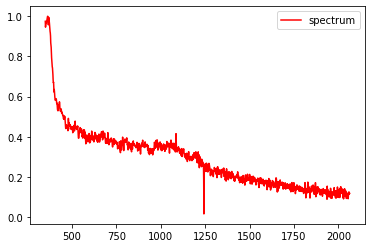

In [28]:
x = np.linspace(351, 2063, 1398)
y = train_data[0]
plt.plot(x, y, c='red', label='spectrum')
plt.legend()
plt.show()

In [29]:
# sklearn 模式
from xgboost import XGBClassifier as XGBC
clf = XGBC().fit(train_data, train_labels)
ypred = clf.predict(test_data)
clf.score(test_data, test_labels)
# Dataset_1 0.9191
# animal_blood_orginal_classify 0.7228
# animal_blood_preprocessing_classify 0.9638
# Reflective_processed_data_padding 0.8906

/Users/renpengju/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8906727828746177

In [ ]:
# xgboost模式
dtrain = xgb.DMatrix(train_data, train_labels)
dtest = xgb.DMatrix(test_data, test_labels)

param = {'eta': 0.08, 'objective': 'multi:softmax', 'num_class': train_labels.shape[0]
        , 'eval_metric': 'mlogloss', }
num_round = 100

bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

preds

In [22]:
# 模型评估指标
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall, roc_auc_score as auc

accuracy(test_labels, preds)

# eta = 0.1    0.9425547996976569
# Dataet_1 0.9433
# animal_blood_orginal_classify 0.7349
# animal_blood_preprocessing_classify 0.9638
# Reflective_processed_data_padding 

0.963855421686747